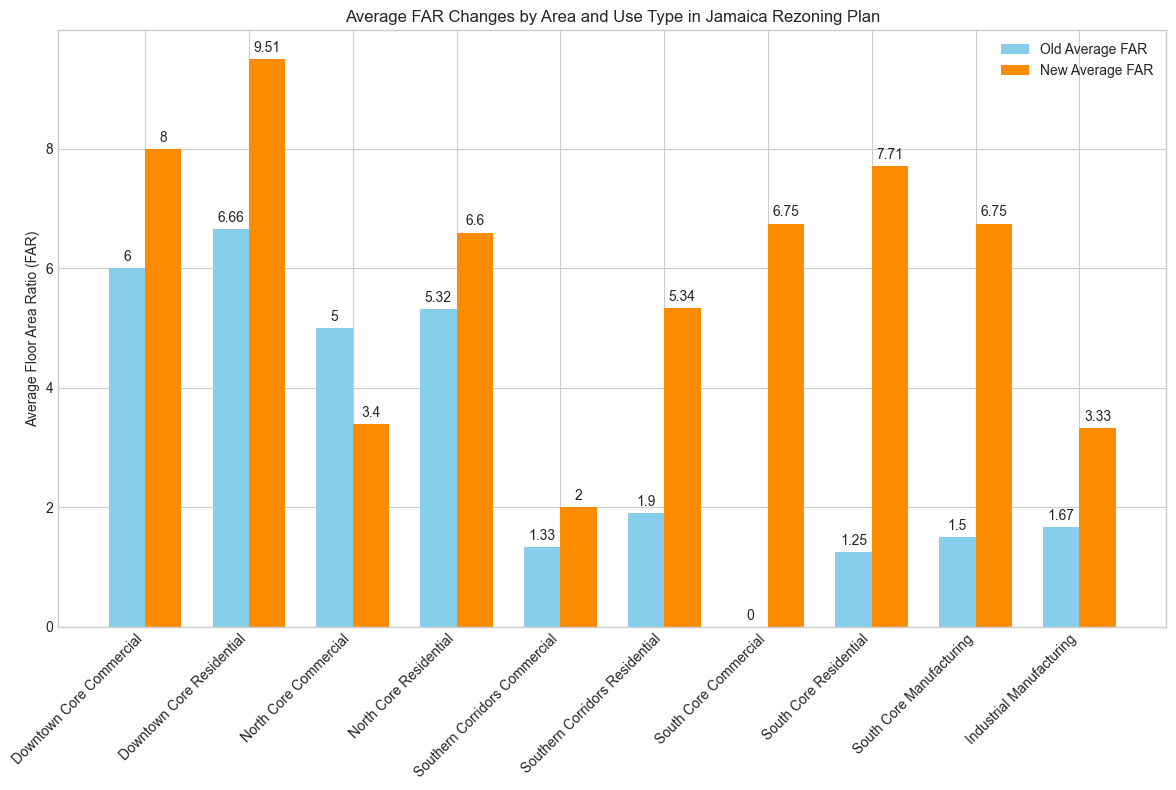

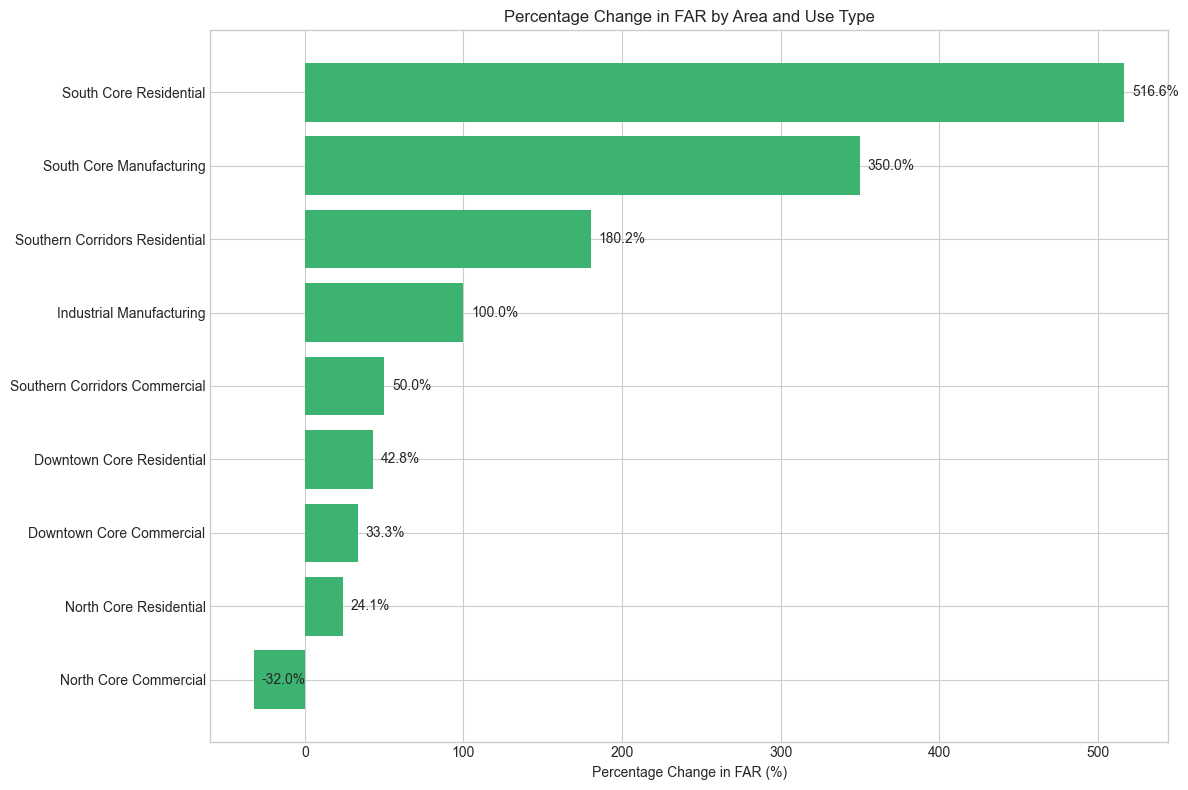

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the analysis
data = {
    'Area': [
        'Downtown Core', 'Downtown Core', 'North Core', 'North Core',
        'Southern Corridors', 'Southern Corridors', 'South Core', 'South Core', 'South Core',
        'Industrial'
    ],
    'Use Type': [
        'Commercial', 'Residential', 'Commercial', 'Residential', 'Commercial',
        'Residential', 'Commercial', 'Residential', 'Manufacturing', 'Manufacturing'
    ],
    'Old Average FAR': [6.0, 6.66, 5.0, 5.32, 1.33, 1.90, 0, 1.25, 1.5, 1.67],
    'New Average FAR': [8.0, 9.51, 3.4, 6.6, 2.0, 5.34, 6.75, 7.71, 6.75, 3.33],
    'Percentage Change': [33.3, 42.8, -32.0, 24.1, 50.0, 180.2, np.nan, 516.6, 350.0, 100.0]
}

df = pd.DataFrame(data)
df['Area_Use'] = df['Area'] + ' ' + df['Use Type']

# Plot 1: Average FAR Changes by Area
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(df['Area_Use']))
width = 0.35

rects1 = ax.bar(x - width/2, df['Old Average FAR'], width, label='Old Average FAR', color='skyblue')
rects2 = ax.bar(x + width/2, df['New Average FAR'], width, label='New Average FAR', color='darkorange')

ax.set_ylabel('Average Floor Area Ratio (FAR)')
ax.set_title('Average FAR Changes by Area and Use Type in Jamaica Rezoning Plan')
ax.set_xticks(x)
ax.set_xticklabels(df['Area_Use'], rotation=45, ha='right')
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('far_changes.png')

# Plot 2: Percentage Change in FAR by Area
df_percent = df.dropna(subset=['Percentage Change']).sort_values('Percentage Change', ascending=False)
plt.figure(figsize=(12, 8))

bars = plt.barh(df_percent['Area_Use'], df_percent['Percentage Change'], color='mediumseagreen')
plt.xlabel('Percentage Change in FAR (%)')
plt.title('Percentage Change in FAR by Area and Use Type')
plt.gca().invert_yaxis() # To display the highest percentage change on top

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%', va='center')

plt.tight_layout()
plt.savefig('percentage_far_changes.png')

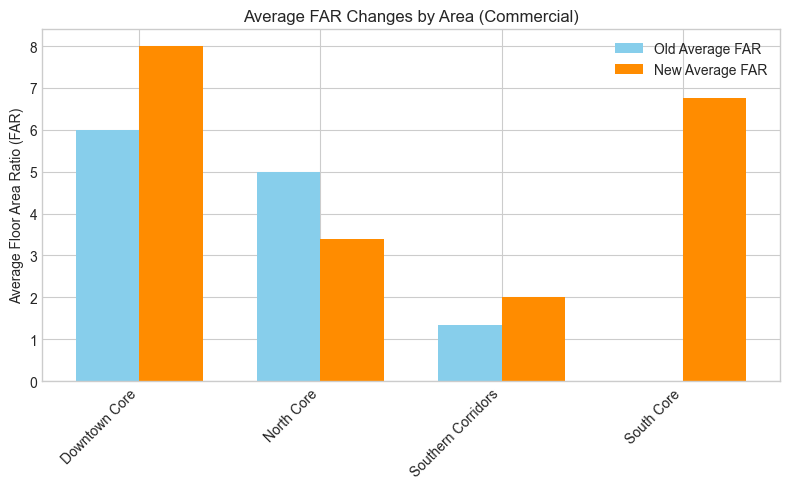

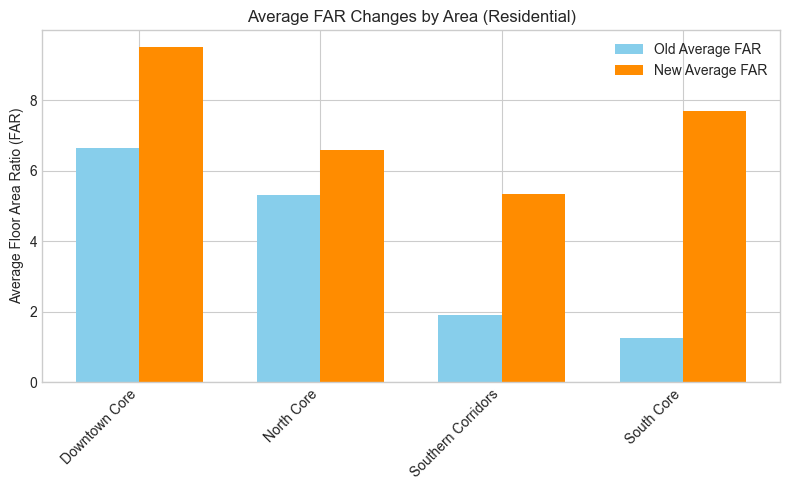

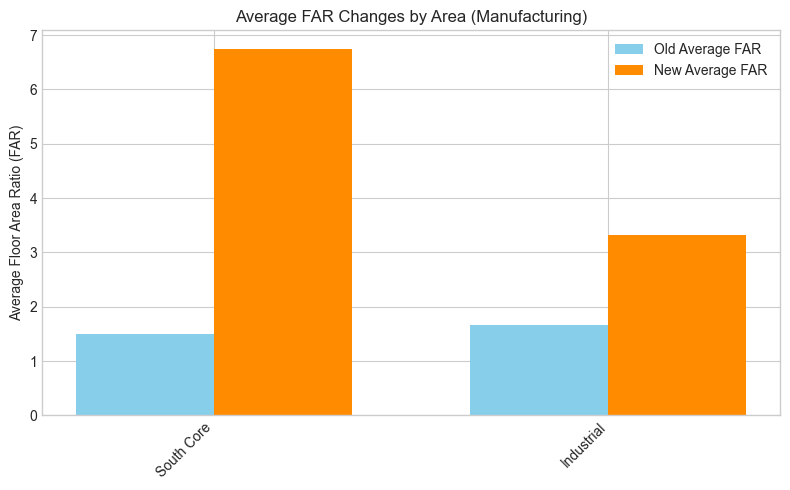

In [10]:
# Separate bar charts for Commercial, Residential, and Manufacturing FAR changes by area
for use_type in ['Commercial', 'Residential', 'Manufacturing']:
    df_use = df[df['Use Type'] == use_type]
    plt.figure(figsize=(8, 5))
    x = np.arange(len(df_use['Area']))
    width = 0.35
    rects1 = plt.bar(x - width/2, df_use['Old Average FAR'], width, label='Old Average FAR', color='skyblue')
    rects2 = plt.bar(x + width/2, df_use['New Average FAR'], width, label='New Average FAR', color='darkorange')
    plt.ylabel('Average Floor Area Ratio (FAR)')
    plt.title(f'Average FAR Changes by Area ({use_type})')
    plt.xticks(x, df_use['Area'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
# Additional % Change in FAR by Area (from summary stats)
far_change_summary = {
    '% Change in Downtown CF FAR': 9.5125,
    '% Change in North Core FAR': 9.255,
    '% Change in Southern Corridors FAR': 2.047669074,
    '% Change in South Core FAR': 7.276666667,
    '% Change in Indutrial FAR': 1
}
far_change_df = pd.DataFrame(list(far_change_summary.items()), columns=['Area', '% Change in FAR'])
print(far_change_df)

                                 Area  % Change in FAR
0         % Change in Downtown CF FAR         9.512500
1          % Change in North Core FAR         9.255000
2  % Change in Southern Corridors FAR         2.047669
3          % Change in South Core FAR         7.276667
4           % Change in Indutrial FAR         1.000000


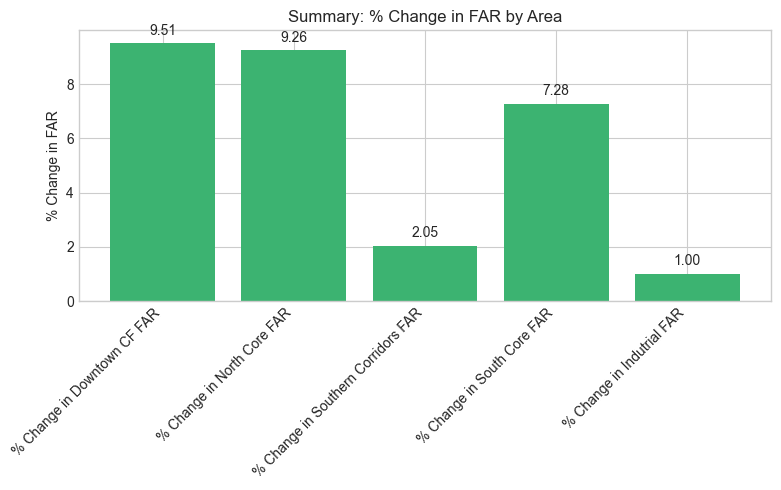

In [12]:
# Bar chart for additional % Change in FAR by Area summary statistics
plt.figure(figsize=(8, 5))
plt.bar(far_change_df['Area'], far_change_df['% Change in FAR'], color='mediumseagreen')
plt.ylabel('% Change in FAR')
plt.title('Summary: % Change in FAR by Area')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(far_change_df['% Change in FAR']):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

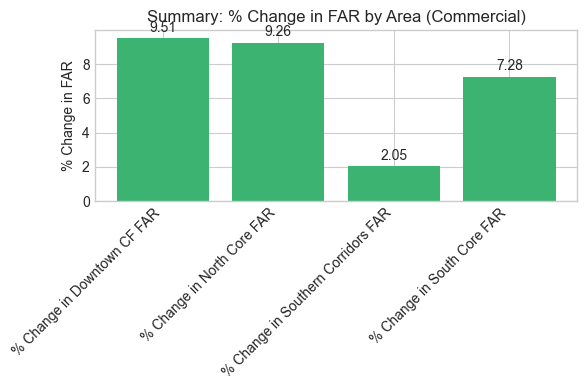

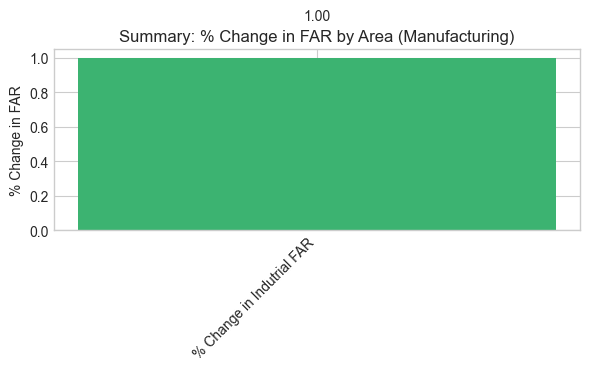

In [13]:
# Add Use Type column to summary DataFrame for correct separation
far_change_df['Use Type'] = [
    'Commercial',    # Downtown CF
    'Commercial',    # North Core
    'Commercial',    # Southern Corridors
    'Commercial',    # South Core
    'Manufacturing'  # Industrial
]

# Plot each use type separately
for use_type in ['Commercial', 'Residential', 'Manufacturing']:
    df_type = far_change_df[far_change_df['Use Type'] == use_type]
    if not df_type.empty:
        plt.figure(figsize=(6, 4))
        plt.bar(df_type['Area'], df_type['% Change in FAR'], color='mediumseagreen')
        plt.ylabel('% Change in FAR')
        plt.title(f'Summary: % Change in FAR by Area ({use_type})')
        plt.xticks(rotation=45, ha='right')
        for i, v in enumerate(df_type['% Change in FAR']):
            plt.text(i, v + 0.2, f'{v:.2f}', ha='center', va='bottom')
        plt.tight_layout()
        plt.show()